# Cats vs Dogs

### Loading our images 
- Images are labeled catxxx.jpg and dogxxx.jpg

In [110]:
# Get filenames in list
from os import listdir
from os.path import isfile, join

mypath = "E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/images/"

In [111]:
p=listdir(mypath)

In [112]:
p[0:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg']

In [113]:
print(len(p))

3002


In [114]:
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))] 

print(str(len(file_names)) + ' images loaded')

3002 images loaded


### Splitting our loaded images into a training and test/validation dataset
- We also need to store their labels (i.e. y_train and y_test)
- We re-size our images here to maintain a constant dimension of 150 x 150
- We're going to use 1000 images of dogs and 1000 images of cats as our training data
- For our test/validation dataset we're going to use 500 of each class
- Dogs will be labels 1 and cats 0
- We store our new images in the following directories
 - /datasets/catsvsdogs/train/dogs
 - /datasets/catsvsdogs/train/cats
 - /datasets/catsvsdogs/validation/dogs
 - /datasets/catsvsdogs/validation/cats

In [119]:
import cv2
import numpy as np
import sys
import os
import shutil

# Extract 1000 for our training data and 500 for our validation set
# Takes about ~20 seconds to run
dog_count = 0
cat_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150  # size of the image
dog_dir_train = "E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/train/dogs/"
cat_dir_train = "E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/train/cats/"
dog_dir_val = "E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/validation/dogs/"
cat_dir_val = "E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/validation/cats/"

In [120]:
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

## To make directory for separate training and validation

In [121]:
make_dir(dog_dir_train)
make_dir(cat_dir_train)
make_dir(dog_dir_val)
make_dir(cat_dir_val)

In [122]:
def getZeros(number):
    if(number > 10 and number < 100):
        return "0"
    if(number < 10):
        return "00"
    else:
        return ""

In [123]:
print(file_names[0])
print(file_names[3001])
print(file_names[0][0])
print(file_names[3001][0])

cat.0.jpg
dog.999.jpg
c
d


In [124]:
for i, file in enumerate(file_names):
    
    if file_names[i][0] == "d":
        dog_count += 1
        image = cv2.imread(mypath+file)    # E:/Tutorial..../datasets/catsvsdogs/images/dog.909.jpg
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)  #size = 150
        if dog_count <= training_size:
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(dog_count)
            cv2.imwrite(dog_dir_train + "dog" + str(zeros) + str(dog_count) + ".jpg", image)
        if dog_count > training_size and dog_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(dog_count-1000)
            cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "c":
        cat_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if cat_count <= training_size:
            training_images.append(image)
            training_labels.append(0)
            zeros = getZeros(cat_count)
            cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
        if cat_count > training_size and cat_count <= training_size+test_size:
            test_images.append(image)
            test_labels.append(0)
            zeros = getZeros(cat_count-1000)
            cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count-1000) + ".jpg", image)

    if dog_count == training_size+test_size and cat_count == training_size+test_size:
        break
print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


In [125]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('cats_vs_dogs_training_data.npz', np.array(training_images))
np.savez('cats_vs_dogs_training_labels.npz', np.array(training_labels))
np.savez('cats_vs_dogs_test_data.npz', np.array(test_images))
np.savez('cats_vs_dogs_test_labels.npz', np.array(test_labels))

In [126]:
# Loader Function
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']    
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)


(x_train, y_train), (x_test, y_test) = load_data_training_and_test("cats_vs_dogs")

In [127]:
x_train.shape

(2000, 150, 150, 3)

In [128]:
for i in range(1,11):
    random = np.random.randint(0, len(training_images))
    cv2.imshow("image_"+str(i), training_images[random])
    if training_labels[random] == 0:
        print(str(i) + " - Cat")
    else:
        print(str(i)+ " - Dog")
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

1 - Dog
2 - Cat
3 - Dog
4 - Cat
5 - Cat
6 - Dog
7 - Cat
8 - Cat
9 - Dog
10 - Cat


In [129]:
# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


### Let's create our model using a simple CNN that similar to what we used for CIFAR10
- Except now we use a Sigmoid instead of Softmax
- **Sigmoids are used when we're doing binary (i.e. two class) classification
- Note the binary_crossentropy loss

In [130]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_31 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 64)       

### Training our model

In [131]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("cats_vs_dogs_V1.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 2000 samples, validate on 1000 samples
Epoch 1/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.7038 - accuracy: 0.5305 - val_loss: 0.6781 - val_accuracy: 0.6230
Epoch 2/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6627 - accuracy: 0.6070 - val_loss: 0.6378 - val_accuracy: 0.6180
Epoch 3/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6157 - accuracy: 0.6565 - val_loss: 0.6118 - val_accuracy: 0.6480
Epoch 4/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5791 - accuracy: 0.6865 - val_loss: 0.5894 - val_accuracy: 0.7000
Epoch 5/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.5378 - accuracy: 0.7340 - val_loss: 0.5744 - val_accuracy: 0.7120
Epoch 6/25
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4924 - accuracy: 0.7645 - val_loss: 0.5860 - val_accuracy: 0.7050
Epoch 7/25
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4468 - acc

### Testing our Classifier

In [132]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model('cats_vs_dogs_V1.h5')

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (252, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Analysis
- Our results aren't bad, but they could be better

# Now let's train our Cats vs Dogs Classifier using Data Augmentation

In [136]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

# E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/train/dogs/

train_data_dir = 'E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/train'
validation_data_dir = 'E:/Tutorial/1.CV/1.Best/10. Data Augmentation Build a Cats vs Dogs Classifier/2.1 datasets.zip/datasets/catsvsdogs/validation'

# Creating our data generator for our test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255
)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Create our model, just like we did previously

In [137]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_41 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_42 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 64)       

In [138]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/25
125/125 [==============================] - 28s 224ms/step - loss: 0.6980 - accuracy: 0.5285 - val_loss: 0.4758 - val_accuracy: 0.5010
Epoch 2/25
125/125 [==============================] - 15s 121ms/step - loss: 0.6914 - accuracy: 0.5910 - val_loss: 0.8316 - val_accuracy: 0.6047
Epoch 3/25
125/125 [==============================] - 17s 138ms/step - loss: 0.6707 - accuracy: 0.5960 - val_loss: 0.6658 - val_accuracy: 0.6707
Epoch 4/25
125/125 [==============================] - 20s 160ms/step - loss: 0.6661 - accuracy: 0.6165 - val_loss: 0.6024 - val_accuracy: 0.5823
Epoch 5/25
125/125 [==============================] - 18s 147ms/step - loss: 0.6549 - accuracy: 0.6220 - val_loss: 0.5118 - val_accuracy: 0.6860
Epoch 6/25
125/125 [==============================] - 17s 133ms/step - loss: 0.6533 - accuracy: 0.6195 - val_loss: 0.7628 - val_accuracy: 0.6972
Epoch 7/25
125/125 [==============================] - 16s 127ms/step - loss: 0.6425 - accuracy: 0.6485 - val_loss: 0.2458 - val_ac

## Plotting our Loss and Accuracy Graphs

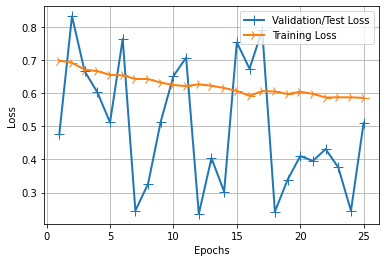

In [139]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

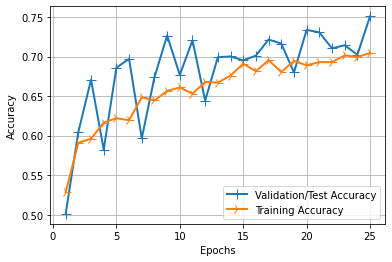

In [140]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [141]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [142]:
Y_pred = model.predict_generator(validation_generator)
Y_pred[0:10]

array([[0.15294477],
       [0.32843012],
       [0.1977062 ],
       [0.28726757],
       [0.29988158],
       [0.2434665 ],
       [0.27976644],
       [0.38436726],
       [0.27154848],
       [0.14306831]], dtype=float32)

In [147]:
y_pred = np.argmax(Y_pred, axis=-1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [144]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
class_labels = validation_generator.class_indices
target_names = list(class_labels)
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[500   0]
 [500   0]]
Classification Report
              precision    recall  f1-score   support

        cats       0.50      1.00      0.67       500
        dogs       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



C:\Users\Siyam\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


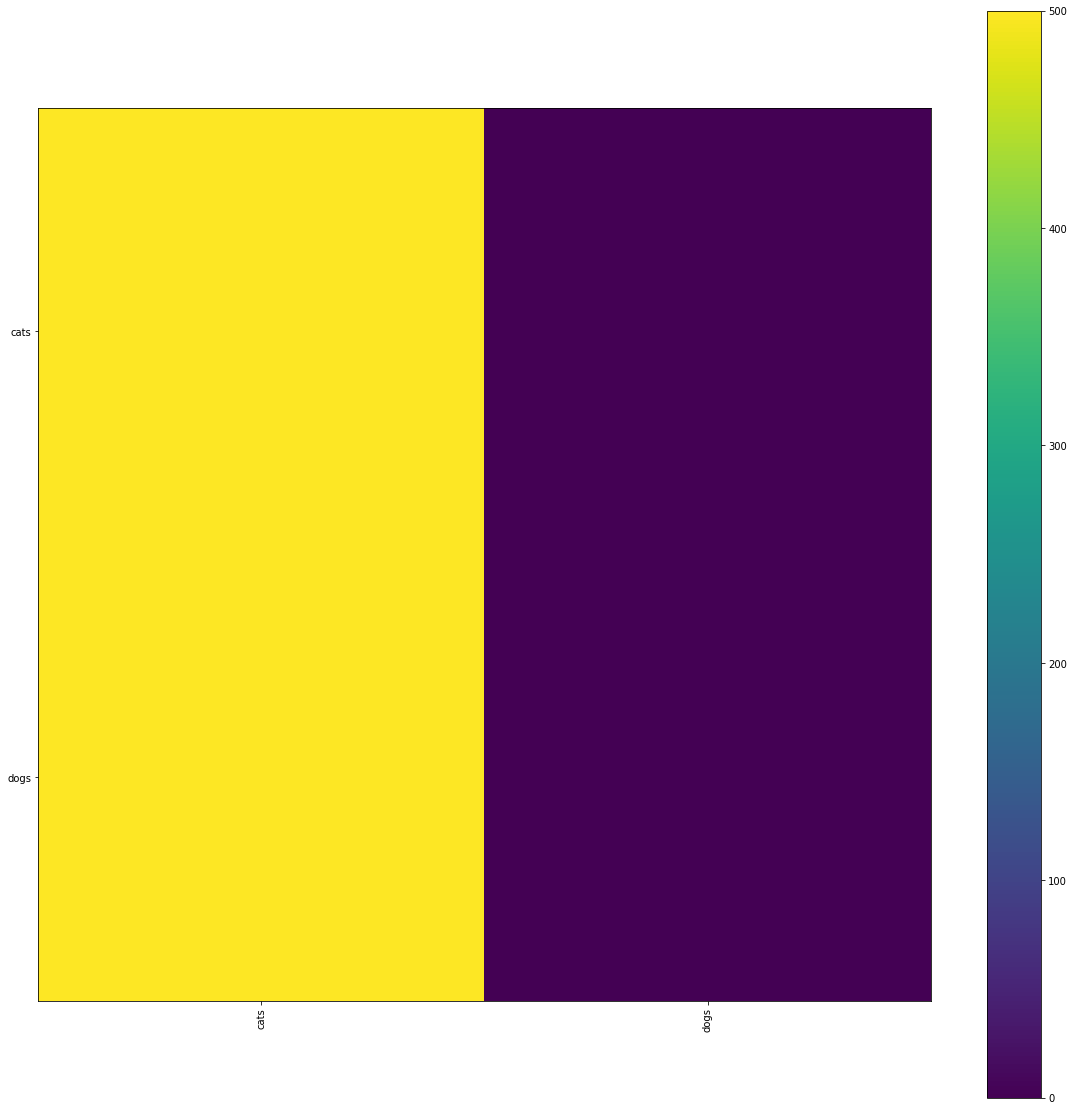

In [146]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('cats_vs_dogs_V1.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 2000 
nb_validation_samples = 1000

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)